In [22]:

import pandas as pd

df = pd.read_csv("usa_oilandgas_production.csv", sep="\t")



In [30]:
df.head(100)

,Unnamed: 0,Production Date,Land Class,Land Category,State,County,FIPS Code,Offshore Region,Commodity,Disposition Code,Disposition Description,Volume
0,0,2015-01-01,Federal,Offshore,Offshore,Offshore,Offshore,Offshore Alaska,Gas (Mcf),1,Sales-Royalty Due-MEASURED,0
1,1,2015-01-01,Federal,Offshore,Offshore,Offshore,Offshore,Offshore Gulf,Gas (Mcf),1,Sales-Royalty Due-MEASURED,14508756
2,2,2015-01-01,Federal,Offshore,Offshore,Offshore,Offshore,Offshore Pacific,Gas (Mcf),1,Sales-Royalty Due-MEASURED,1207520
3,3,2015-01-01,Federal,Offshore,Offshore,Offshore,Offshore,Offshore Gulf,Gas (Mcf),4,Sales-Royalty Due-Not Measured,487324
4,4,2015-01-01,Federal,Offshore,Offshore,Offshore,Offshore,Offshore Pacific,Gas (Mcf),4,Sales-Royalty Due-Not Measured,114808
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,2015-01-01,Federal,Onshore,AR,Logan,5083.0,Onshore,Gas (Mcf),1,Sales-Royalty Due-MEASURED,302347
96,96,2015-01-01,Federal,Onshore,AR,Pope,5115.0,Onshore,Gas (Mcf),1,Sales-Royalty Due-MEASURED,11267
97,97,2015-01-01,Federal,Onshore,AR,Sebastian,5131.0,Onshore,Gas (Mcf),1,Sales-Royalty Due-MEASURED,211689
98,98,2015-01-01,Federal,Onshore,AR,Sharp,5135.0,Onshore,Gas (Mcf),1,Sales-Royalty Due-MEASURED,2178


In [ ]:
#For offshore only
counties_df = df[~df['County'].str.contains('Offshore', case=False, na=False)]

In [62]:
#How many unique counties are there?
counties_df['County'].nunique()

317

In [64]:
counties_df['County'].unique()

array(['Kenai (Post)', 'Tyonek', 'Tuscaloosa', 'Cleburne', 'Conway',
       'Crawford', 'Faulkner', 'Franklin', 'Johnson', 'Logan', 'Pope',
       'Sebastian', 'Sharp', 'Van Buren', 'White', 'Yell', 'Contra Costa',
       'Glenn', 'Kern', 'Los Angeles', 'Sacramento', 'San Joaquin',
       'Santa Barbara', 'Solano', 'Ventura', 'Archuleta', 'Baca', 'Bent',
       'Broomfield', 'Cheyenne', 'Delta', 'Dolores', 'Garfield',
       'Gunnison', 'Huerfano', 'Kiowa', 'La Plata', 'Las Animas', 'Mesa',
       'Moffat', 'Montezuma', 'Phillips', 'Prowers', 'Rio Blanco',
       'Routt', 'San Miguel', 'Washington', 'Weld', 'Yuma', 'Comanche',
       'Ellsworth', 'Finney', 'Grant', 'Hamilton', 'Kearny', 'Meade',
       'Morton', 'Seward', 'Stanton', 'Stevens', 'Clay', 'Floyd',
       'Lawrence', 'Leslie', 'Letcher', 'Mccreary', 'Morgan', 'Pike',
       'Whitley', 'Beauregard', 'Bienville', 'Bossier', 'Caddo',
       'Caldwell', 'Claiborne', 'De Soto', 'Lincoln', 'Morehouse',
       'Ouachita', 'Plaquem

In [72]:
#Which county is most productive?
counties_df.groupby('County')['Volume'].sum().sort_values(ascending=False)

County
Sublette       8064839406
Eddy           6739997815
Lea            5642299669
San Juan       2621146686
Rio Arriba     1790498371
                  ...    
Beauregard            105
Choctaw                65
Yellowstone             5
Kenai (Pre)             0
Clarke                  0
Name: Volume, Length: 317, dtype: int64

In [68]:
#How many states are there?
counties_df['State'].unique()

array(['AK', 'AL', 'AR', 'CA', 'CO', 'KS', 'KY', 'LA', 'MI', 'MS', 'MT',
       'ND', 'NM', 'NY', 'OH', 'OK', 'PA', 'SD', 'TX', 'UT', 'VA', 'WV',
       'WY', 'IL', 'NE', 'NV', 'ID'], dtype=object)

In [70]:
df['State'].nunique()

28

In [76]:
#What are the top 5 states by volume?
counties_df.groupby('State')['Volume'].sum().sort_values(ascending=False).head()

State
NM    16918717269
WY    13262488622
CO     6121273504
UT     1870280368
ND     1362627869
Name: Volume, dtype: int64

In [80]:
#What are the top 5 states by volume in 2017?
# First, make sure 'Production Date' is datetime
counties_df['Production Date'] = pd.to_datetime(df['Production Date'])

# Filter for year 2017
df_2017 = counties_df[counties_df['Production Date'].dt.year == 2017]

# Group by county and sum volumes, then sort descending
top_counties_2017 = df_2017.groupby('State')['Volume'].sum().sort_values(ascending=False).head(5)

print(top_counties_2017)


State
WY    1445442618
NM     889068131
CO     657397303
UT     199563568
ND      89346692
Name: Volume, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_38404\1181093586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counties_df['Production Date'] = pd.to_datetime(df['Production Date'])


In [54]:
#Please list out all years and the most productive state for each year

# Ensure 'Production Date' is datetime
df['Production Date'] = pd.to_datetime(df['Production Date'])

# Extract year
df['Year'] = df['Production Date'].dt.year

# Remove offshore rows
df_filtered = df[~df['County'].str.contains('Offshore', case=False, na=False)]

# Group by Year and State, sum Volume
state_year_volume = df_filtered.groupby(['Year', 'State'])['Volume'].sum().reset_index()

# For each year, find the state with max volume
most_productive_state_per_year = state_year_volume.loc[state_year_volume.groupby('Year')['Volume'].idxmax()]

print(most_productive_state_per_year)


     Year State      Volume
26   2015    WY  1583118750
53   2016    WY  1477790528
80   2017    WY  1445442618
107  2018    WY  1457581069
134  2019    WY  1326093545
150  2020    NM  1393155760
177  2021    NM  1736132350
204  2022    NM  2143159295
230  2023    NM  2516660961
257  2024    NM  2926038279
283  2025    NM  1256345879


In [82]:
import pandas as pd


offshore_df = df[df['County'].str.contains('Offshore', case=False, na=False)]

# Example: most productive offshore region overall
most_productive_offshore = offshore_df.groupby('Offshore Region')['Volume'].sum().sort_values(ascending=False).head(1)
print("\nMost productive offshore region:\n", most_productive_offshore)



Most productive offshore region:
 Offshore Region
Offshore Gulf    16294904329
Name: Volume, dtype: int64


In [ ]:
most_productive_county = counties_df.groupby('County')['Volume'].sum().sort_values(ascending=False).head(1)
print("Most productive county:\n", most_productive_county)

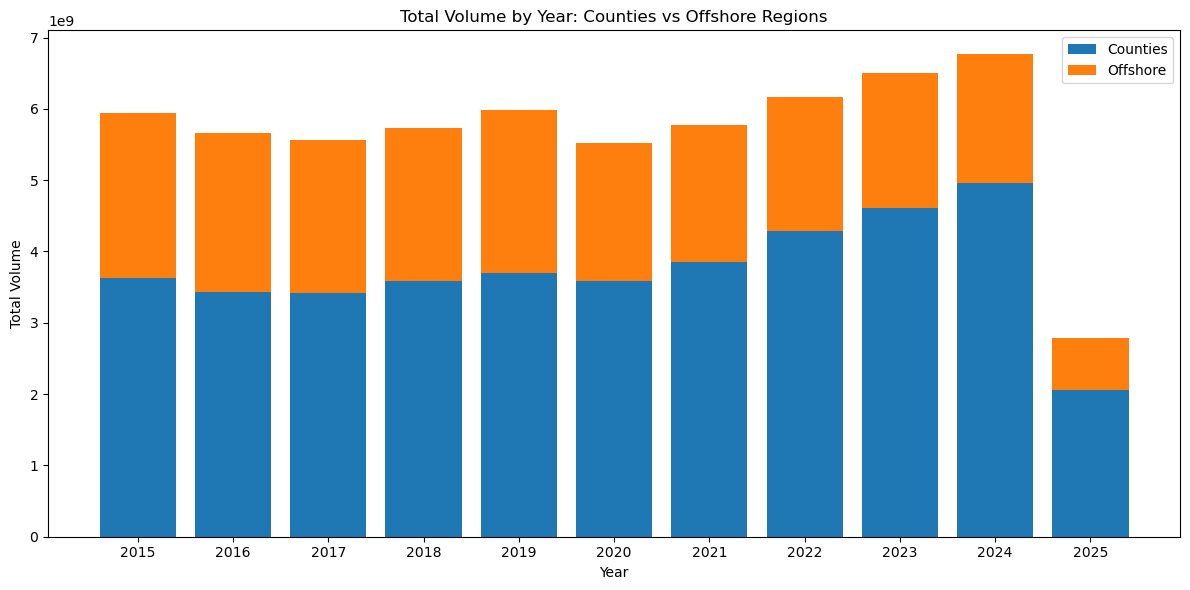

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Production Date' is datetime
df['Production Date'] = pd.to_datetime(df['Production Date'])

# Extract year
df['Year'] = df['Production Date'].dt.year

# Separate counties and offshore
counties_df = df[~df['County'].str.contains('Offshore')]
offshore_df = df[df['County'].str.contains('Offshore', case=False, na=False)]

# Sum volumes by year
counties_year = counties_df.groupby('Year')['Volume'].sum()
offshore_year = offshore_df.groupby('Year')['Volume'].sum()

# Create a stacked bar chart
plt.figure(figsize=(12,6))
plt.bar(counties_year.index, counties_year.values, label='Counties')
plt.bar(offshore_year.index, offshore_year.values, bottom=counties_year.values, label='Offshore')

plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.title('Total Volume by Year: Counties vs Offshore Regions')
plt.legend()
plt.xticks(counties_year.index)  # ensure all years show
plt.tight_layout()
plt.show()
